# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [458]:
import numpy as np
import pandas as pd

In [459]:
df = pd.read_csv('Ice_cream selling data.csv')

In [460]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


### Check Duplicated

In [461]:
df.duplicated().sum()

np.int64(0)

### Check Null Values

In [462]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

### Graph

In [463]:
import matplotlib.pyplot as plt

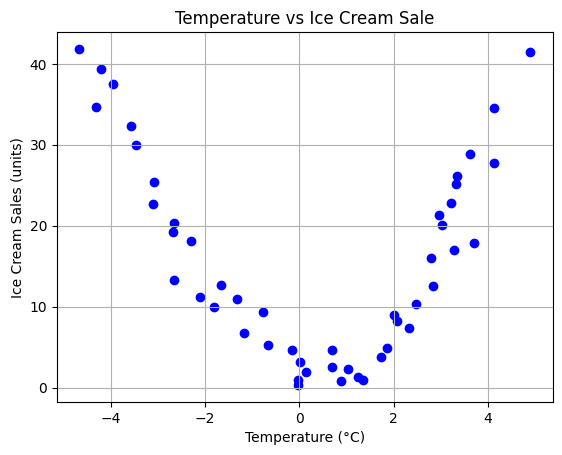

In [464]:
plt.scatter(df['Temperature (°C)'],df['Ice Cream Sales (units)'],color='blue')
plt.title("Temperature vs Ice Cream Sale")
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.grid(True)
plt.show()

### Getting the inputs and output

In [465]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [466]:
X

array([[-4.66226268],
       [-4.31655945],
       [-4.21398476],
       [-3.94966109],
       [-3.57855372],
       [-3.4557117 ],
       [-3.10844012],
       [-3.08130332],
       [-2.67246083],
       [-2.65228679],
       [-2.65149803],
       [-2.288264  ],
       [-2.11186969],
       [-1.81893761],
       [-1.66034773],
       [-1.32637898],
       [-1.17312327],
       [-0.77333004],
       [-0.6737528 ],
       [-0.14963487],
       [-0.0361565 ],
       [-0.03389529],
       [ 0.0086077 ],
       [ 0.14924457],
       [ 0.68878091],
       [ 0.69359887],
       [ 0.87490503],
       [ 1.02418081],
       [ 1.24071162],
       [ 1.35981267],
       [ 1.74000001],
       [ 1.85055193],
       [ 1.99931037],
       [ 2.0751006 ],
       [ 2.31859124],
       [ 2.471946  ],
       [ 2.78483646],
       [ 2.83176021],
       [ 2.95993209],
       [ 3.02087431],
       [ 3.21136614],
       [ 3.27004407],
       [ 3.31607252],
       [ 3.33593241],
       [ 3.61077848],
       [ 3

In [467]:
y

array([41.84298632, 34.66111954, 39.38300088, 37.53984488, 32.28453119,
       30.00113848, 22.63540128, 25.36502221, 19.22697005, 20.27967918,
       13.2758285 , 18.12399121, 11.21829447, 10.01286785, 12.61518115,
       10.95773134,  6.68912264,  9.39296866,  5.21016262,  4.67364254,
        0.32862552,  0.89760319,  3.16560001,  1.93141603,  2.57678224,
        4.62568946,  0.78997365,  2.31380636,  1.29236081,  0.95311531,
        3.78257014,  4.8579878 ,  8.94382321,  8.17073494,  7.41209403,
       10.33663062, 15.99661997, 12.56823739, 21.34291574, 20.11441346,
       22.8394055 , 16.98327874, 25.14208223, 26.10474041, 28.91218793,
       17.84395652, 34.53074274, 27.69838335, 41.51482194])

### Creating the Training Set and the Test Set

In [468]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [469]:
X_train.shape

(36, 1)

In [470]:
X_test.shape

(13, 1)

In [471]:
y_train.shape

(36,)

In [472]:
y_test.shape

(13,)

## Part 2 - Building and training the model

### Building the model

In [473]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the model

In [474]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Normalazation Data 

### Inference

Making the predictions of the data points in the test set

In [475]:
y_pred = model.predict(X_test)

In [476]:
y_pred

array([15.11050201, 16.81939351, 12.71709561, 16.10991332, 13.35506454,
       12.49436449, 12.09927959, 16.59800305, 16.47814493, 18.74691437,
       18.40811755, 17.22782674, 15.80775997])

Making the prediction of a single data point with AT = 15, V = 40, AP = 1000, RH = 75

## Part 3: Evaluating the model

### intercept (c)

In [477]:
model.intercept_

np.float64(15.22329719123106)

### coef(M)

In [478]:
model.coef_

array([-0.75577406])

### R-Score

In [479]:
model.score(X_train,y_train)

0.026428744644855007

In [480]:
model.score(X_test,y_test)

-0.05642184626434288

### R-Squared

In [481]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

In [482]:
r2

-0.05642184626434288

### Adjusted R-Squared

In [483]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)

In [484]:
adj_r2

-0.15246019592473758

### Underfiting Analysiing

In [485]:
pd.DataFrame([X_test.reshape(-1),y_pred]).T

,0,1
0,0.149245,15.110502
1,-2.111870,16.819394
2,3.316073,12.717096
3,-1.173123,16.109913
4,2.471946,13.355065
5,3.610778,12.494364
6,4.133534,12.099280
7,-1.818938,16.598003
8,-1.660348,16.478145
9,-4.662263,18.746914


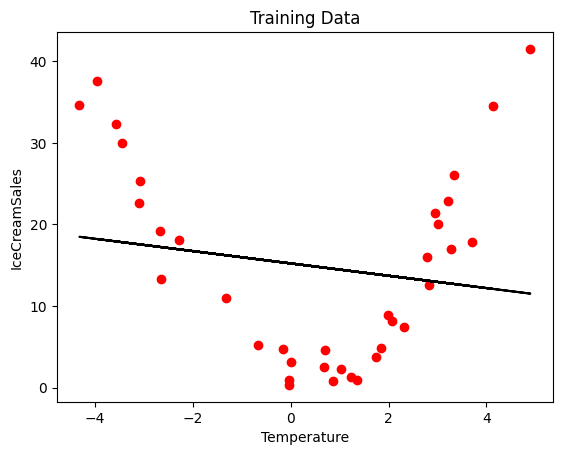

In [486]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='black')
plt.title('Training Data')
plt.xlabel('Temperature')
plt.ylabel("IceCreamSales")
plt.show()

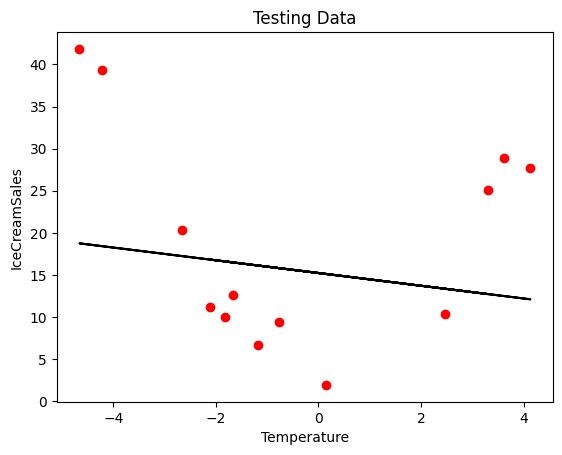

In [487]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model.predict(X_test),color='black')
plt.title('Testing Data')
plt.xlabel('Temperature')
plt.ylabel("IceCreamSales")
plt.show()

### Polynomial Regrssion 

In [488]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree)

In [489]:
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

In [490]:
x_train_poly

array([[ 1.00000000e+00,  1.74000001e+00,  3.02760004e+00],
       [ 1.00000000e+00,  6.93598873e-01,  4.81079396e-01],
       [ 1.00000000e+00,  4.13086796e+00,  1.70640701e+01],
       [ 1.00000000e+00,  1.35981267e+00,  1.84909051e+00],
       [ 1.00000000e+00,  1.02418081e+00,  1.04894634e+00],
       [ 1.00000000e+00, -4.31655945e+00,  1.86326855e+01],
       [ 1.00000000e+00,  6.88780908e-01,  4.74419139e-01],
       [ 1.00000000e+00,  2.07510060e+00,  4.30604249e+00],
       [ 1.00000000e+00,  2.95993209e+00,  8.76119799e+00],
       [ 1.00000000e+00, -1.49634867e-01,  2.23905933e-02],
       [ 1.00000000e+00,  2.78483646e+00,  7.75531413e+00],
       [ 1.00000000e+00, -2.65149803e+00,  7.03044182e+00],
       [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01],
       [ 1.00000000e+00, -3.10844012e+00,  9.66239999e+00],
       [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01],
       [ 1.00000000e+00,  3.02087431e+00,  9.12568162e+00],
       [ 1.00000000e+00, -3.45571170e+00

In [491]:
x_test_poly

array([[ 1.        ,  0.14924457,  0.02227394],
       [ 1.        , -2.11186969,  4.45999359],
       [ 1.        ,  3.31607252, 10.99633695],
       [ 1.        , -1.17312327,  1.3762182 ],
       [ 1.        ,  2.471946  ,  6.11051701],
       [ 1.        ,  3.61077848, 13.03772121],
       [ 1.        ,  4.13353379, 17.08610158],
       [ 1.        , -1.81893761,  3.30853403],
       [ 1.        , -1.66034773,  2.75675458],
       [ 1.        , -4.66226268, 21.73669327],
       [ 1.        , -4.21398476, 17.7576676 ],
       [ 1.        , -2.65228679,  7.03462523],
       [ 1.        , -0.77333004,  0.59803936]])

In [492]:
model = LinearRegression()
model.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [493]:
model.intercept_

np.float64(2.3632722680806495)

In [494]:
model.coef_

array([ 0.        , -0.9218146 ,  1.88955396])

In [495]:
model.score(x_train_poly,y_train)

0.9305461234336039

In [496]:
model.score(x_test_poly,y_test)

0.9246589118303955

In [497]:
y_poly_pred = model.predict(x_test_poly)

In [498]:
pd.DataFrame([X_test.reshape(-1),y_poly_pred]).T

,0,1
0,0.149245,2.267784
1,-2.111870,12.737423
2,3.316073,20.084640
3,-1.173123,6.045113
4,2.471946,11.630748
5,3.610778,23.670282
6,4.133534,30.838031
7,-1.818938,10.291649
8,-1.660348,9.102842
9,-4.662263,47.733669


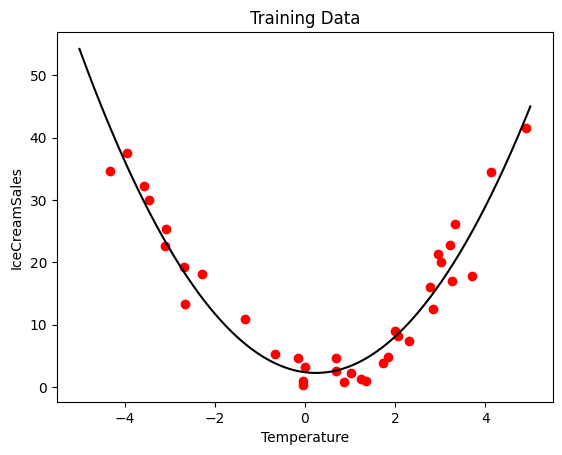

In [499]:
plt.scatter(X_train, y_train,color = 'red')
plt.plot(np.linspace(-5,5,500).reshape(500,1),model.predict(poly.fit_transform(np.linspace(-5,5,500).reshape(500,1))), color = 'black')
plt.title("Training Data")
plt.xlabel("Temperature")
plt.ylabel("IceCreamSales")
plt.show()

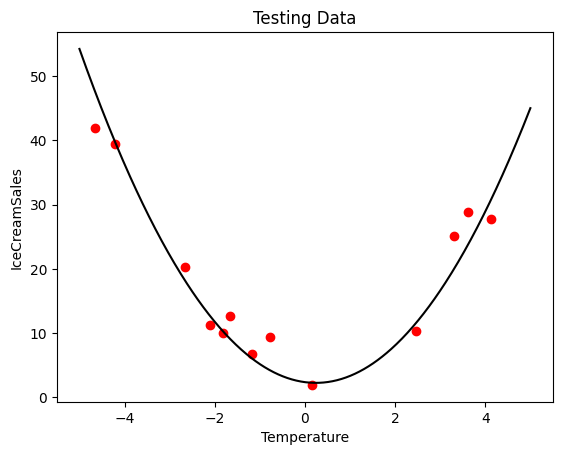

In [500]:
plt.scatter(X_test, y_test,color = 'red')
plt.plot(np.linspace(-5,5,500).reshape(500,1),model.predict(poly.fit_transform(np.linspace(-5,5,500).reshape(500,1))), color = 'black')
plt.title("Testing Data")
plt.xlabel("Temperature")
plt.ylabel("IceCreamSales")
plt.show()